In [1]:
import xgboost
print(xgboost.__version__)

1.5.0


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_log_error, r2_score
from statistics import mean, mode, median
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import kurtosis
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler

In [4]:
base = pd.read_csv('../Data/BaseData.csv')

In [5]:
base.shape

(2580, 299)

In [6]:
xgb = XGBRegressor()

In [7]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

In [8]:
xgb.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [9]:
xgb.score(X,y)

0.9984031075595289

In [10]:
X_cols = base.drop(['SalePrice'], axis=1).columns
sorted_importance = sorted(zip(X_cols, xgb.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('OverallQual', 0.39715126),
 ('GarageCars', 0.08532192),
 ('BsmtCond_Fa', 0.06479055),
 ('GrLivArea', 0.046799008),
 ('Neighborhood_Veenker', 0.024265682),
 ('TotalBsmtSF', 0.023196483),
 ('CentralAir_Y', 0.018222995),
 ('MSZoning_RM', 0.017491244),
 ('FireplaceQu_None', 0.015315327),
 ('BsmtQual_Gd', 0.012109374),
 ('1stFlrSF', 0.010599186),
 ('PavedDrive_Y', 0.009888931),
 ('YearBuilt', 0.009863658),
 ('BsmtFinSF1', 0.009328845),
 ('Neighborhood_Edwards', 0.008787639),
 ('GarageArea', 0.008685236),
 ('GarageType_None', 0.008452928),
 ('KitchenQual_TA', 0.008421155),
 ('BsmtFinType1_GLQ', 0.0074977945),
 ('SaleCondition_Family', 0.007019675),
 ('BsmtFullBath', 0.006679238),
 ('SaleType_New', 0.006671398),
 ('BsmtExposure_Gd', 0.0056451303),
 ('GarageCond_TA', 0.0054668984),
 ('GarageType_Detchd', 0.004723312),
 ('YearRemodAdd', 0.004459597),
 ('SaleCondition_Partial', 0.0043309038),
 ('MSSubClass_190', 0.0042585935),
 ('LotArea', 0.0041622836),
 ('Neighborhood_Crawfor', 0.0041106925

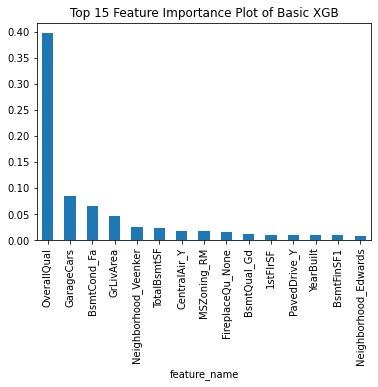

In [11]:
a, b = zip(*sorted_importance[0:15]) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.bar(x='feature_name',y='importance_score', legend=None)
plt.title('Top 15 Feature Importance Plot of Basic XGB');

## No Scaling......vs ##

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [13]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [14]:
xgb.score(X_train, y_train)

0.9992876177409592

In [15]:
xgb.score(X_test, y_test)

0.9187227594804701

In [16]:
predicted_value = xgb.predict(X_test)
true_value = y_test

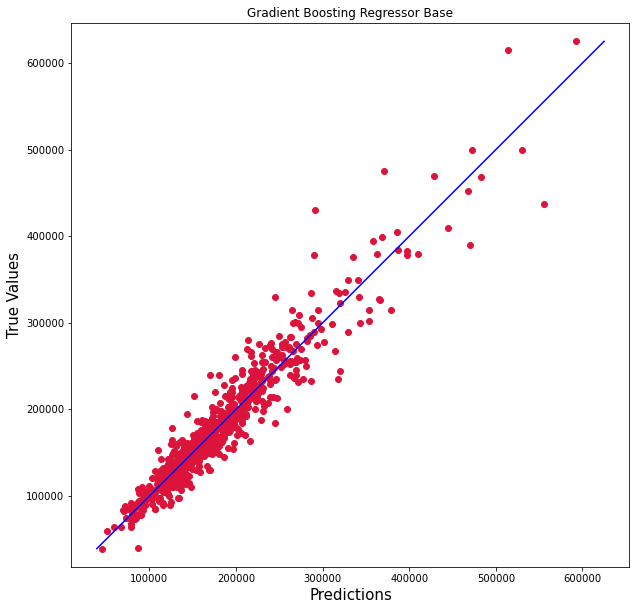

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(predicted_value, true_value, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

plt.title('Gradient Boosting Regressor Base')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('True Values', fontsize=15)
plt.axis('equal')
plt.show()

## Scaling.... ## 

In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [20]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [21]:
xgb.score(X_train, y_train)

0.9991972526451972

In [22]:
xgb.score(X_test, y_test)

0.8946414278135322

In [23]:
X_cols = base.drop(['SalePrice'], axis=1).columns
sorted_importance = sorted(zip(X_cols, xgb.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('OverallQual', 0.4377083),
 ('GarageCars', 0.07930941),
 ('GrLivArea', 0.062748946),
 ('Fireplaces', 0.032013535),
 ('MSZoning_RM', 0.024434492),
 ('FireplaceQu_None', 0.01903231),
 ('1stFlrSF', 0.015089417),
 ('TotalBsmtSF', 0.01433102),
 ('BsmtFinType1_GLQ', 0.01211169),
 ('BsmtFinSF1', 0.011485379),
 ('Neighborhood_Veenker', 0.011415432),
 ('GarageCond_TA', 0.010419299),
 ('Neighborhood_Edwards', 0.01018357),
 ('Functional_Sal', 0.009562345),
 ('KitchenQual_TA', 0.009332806),
 ('GarageArea', 0.008527528),
 ('GarageType_Detchd', 0.008344959),
 ('CentralAir_Y', 0.007212607),
 ('MSSubClass_190', 0.006842276),
 ('BsmtExposure_Gd', 0.0065357327),
 ('YearBuilt', 0.0065161227),
 ('Heating_GasA', 0.006406363),
 ('Neighborhood_Crawfor', 0.005789697),
 ('SaleType_New', 0.005774448),
 ('GarageType_Attchd', 0.0056588296),
 ('Foundation_Slab', 0.005638416),
 ('HouseStyle_2Story', 0.005186373),
 ('Condition1_PosN', 0.00493001),
 ('Foundation_Wood', 0.0049179075),
 ('BsmtExposure_No', 0.00488840

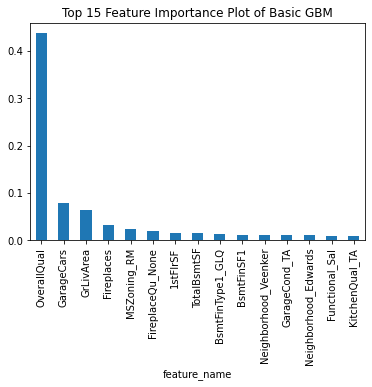

In [24]:
a, b = zip(*sorted_importance[0:15]) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.bar(x='feature_name',y='importance_score', legend=None)
plt.title('Top 15 Feature Importance Plot of Basic GBM');

In [25]:
predicted_value = xgb.predict(X_test)

In [26]:
true_value = y_test

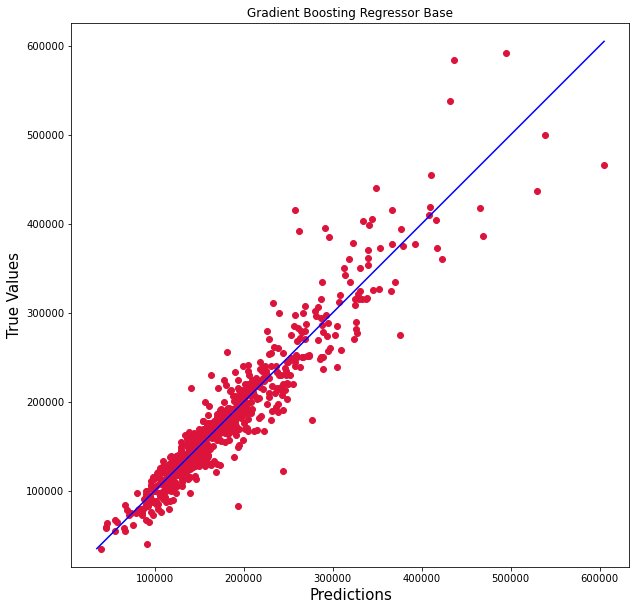

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(predicted_value, true_value, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

plt.title('Gradient Boosting Regressor Base')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('True Values', fontsize=15)
plt.axis('equal')
plt.show()